In [48]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

In [49]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
df.shape

(768, 9)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## 0-> Non-Diabetic
## 1->Diabetic

In [56]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [57]:
#Identify and replace '0' with NaN
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

#Impute NaN values with the median of each column 
for col in cols_to_replace:
    df[col] = df[col].fillna(df[col].median())

In [58]:
# seperating data and labels
X = df.drop(columns= 'Outcome', axis=1 )
y = df['Outcome']

print(X)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [59]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Data Standardization

In [60]:
scaler = StandardScaler()

scaler.fit(X)

standardized_data = scaler.transform(X)

print(standardized_data)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]


In [61]:
X = standardized_data
y = df['Outcome']

print(X)
print(y)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Train Test Split

In [62]:
X_train , X_test , y_train , y_test = train_test_split(
    X,y, test_size=0.2, stratify=y, random_state=42)

print(X.shape,X_train.shape,X_test.shape)


(768, 8) (614, 8) (154, 8)


In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: Outcome
0    400
1    214
Name: count, dtype: int64
After SMOTE: Outcome
0    400
1    400
Name: count, dtype: int64


## Training the model

In [64]:
#grid of parameters to search
param_grid = {
    'C': [0.1, 1, 10,50, 100],
    'gamma': [0.01, 0.001],
    'kernel': ['rbf', 'linear'] 
}

#Create a GridSearchCV object
grid_search = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2, scoring='f1')

# Fit the grid search to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# The best estimator found will be the optimized model
optimized_clf = grid_search.best_estimator_

#Print the best parameters found
print("Best parameters found on training set: ", grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.00

In [65]:
# Print the best score achieved across all models
print("Best cross-validation F1-Score: ", grid_search.best_score_)

# Find and print the results for the best model using the 'linear' kernel
linear_results = pd.DataFrame(grid_search.cv_results_)
best_linear_index = linear_results[linear_results['param_kernel'] == 'linear']['mean_test_score'].idxmax()
best_linear_params = linear_results.iloc[best_linear_index]['params']
best_linear_f1 = linear_results.iloc[best_linear_index]['mean_test_score']

print("\nBest Linear Parameters: ", best_linear_params)
print("Best Linear CV F1-Score: ", best_linear_f1)

Best cross-validation F1-Score:  0.7694540599496769

Best Linear Parameters:  {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best Linear CV F1-Score:  0.74104925995105


## model Evaluation

In [66]:
#Accuracy Score on the training data
X_train_prediction = optimized_clf.predict(X_train_resampled)

training_data_accuracy = accuracy_score(X_train_prediction,y_train_resampled)

print('Accuracy score of the training data: ' ,training_data_accuracy)

Accuracy score of the training data:  0.81125


In [67]:
#Accuracy Score on the test data
X_test_prediction = optimized_clf.predict(X_test)

test_data_accuracy = accuracy_score(X_test_prediction,y_test)

print('Accuracy score of the test data: ' ,test_data_accuracy)

Accuracy score of the test data:  0.7402597402597403


## Evaluation Metrics

F1 score of the test data:  0.6491228070175439

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       100
           1       0.62      0.69      0.65        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154


Confusion Matrix:
 [[77 23]
 [17 37]]

ROC-AUC Score: 0.8277777777777777


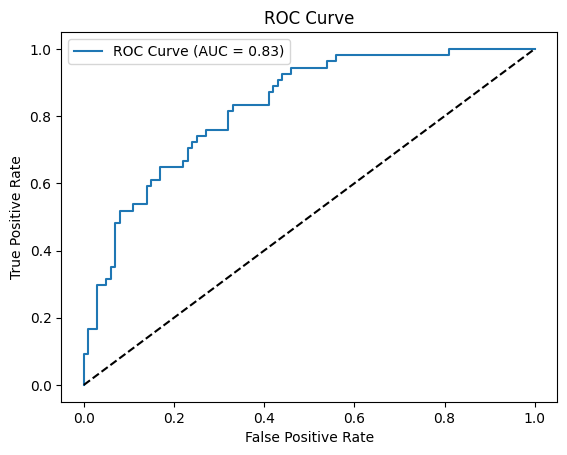

In [68]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

test_f1_score = f1_score(y_test, X_test_prediction)
print('F1 score of the test data: ', test_f1_score)

#Classification report
print("\nClassification Report:\n", classification_report(y_test, X_test_prediction))

#Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, X_test_prediction))

#ROC-AUC using decision scores
y_prob = optimized_clf.decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", roc_auc)

#ROC Curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<Axes: >

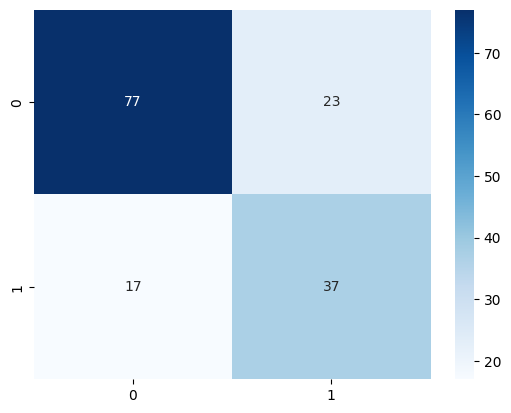

In [69]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, X_test_prediction), annot=True, fmt="d", cmap="Blues")

## Predictive System 

In [70]:
# random row selected from dataset excluding last column 
input_data = (2,197,70,45,543,30.5,0.158,53)

input_df = pd.DataFrame([input_data], columns=df.drop('Outcome', axis=1).columns)

# standardize the data
std_data = scaler.transform(input_df)

prediction = optimized_clf.predict(std_data)

print(prediction)

if (prediction[0]==0):
    print('The person is not Diabetic')
else:
    print('The person is Diabetic')

[1]
The person is Diabetic


In [72]:
import pickle
import os

MODEL_FILE = 'optimized_model.pkl'
SCALER_FILE = 'scaler.pkl'

with open(MODEL_FILE, 'wb') as file:
    pickle.dump(optimized_clf, file)
    
print(f"✅ Successfully saved the optimized model to: {os.path.abspath(MODEL_FILE)}")

with open(SCALER_FILE, 'wb') as file:
    pickle.dump(scaler, file)
    
print(f"✅ Successfully saved the fitted scaler to: {os.path.abspath(SCALER_FILE)}")


✅ Successfully saved the optimized model to: d:\projects\Data\Machine Learning\Diabetes Prediction\optimized_model.pkl
✅ Successfully saved the fitted scaler to: d:\projects\Data\Machine Learning\Diabetes Prediction\scaler.pkl
